# Decision Trees with `iris`

Created by: Cristian E. Nuno

Date: May 19, 2019

## Introduction

In this lesson, we'll walkthrough the key components of a **_Decision Tree Classifier_**.

## Objectives

You will be able to:

* Understand how to interpret a Decision Tree Classifier

## Decision Trees

![chocolate decision tree](visuals/chocolate_decision_tree.jpg)

A [decision tree](https://www.smartdraw.com/decision-tree/) is a flowchart-like diagram that shows the various outcomes from a series of decisions. Decision trees have three main parts: 

1. a root node;
2. leaf nodes; and
3. branches. 

The root node is at the very top of the tree (i.e. "How is your day?"). Both root and leaf nodes (i.e. "Good" v. "Bad") contain a condition that splits the sample into those that do and do not satisfy the condition. 

Branches are arrows connecting nodes, showing the flow of splitting by each condition in a node. Each node typically has two or more nodes extending from it until there can be no more splitting (i.e. "Eat chocolate").

## `iris` data set

We're going to import the [**_Iris Dataset_**](https://gist.github.com/curran/a08a1080b88344b0c8a7). 

![iris flowers](visuals/iris_flowers.png)

> This famous (Fisher's or Anderson's) `iris` data set gives 150 measurements (in centimeters) of the variables sepal length and width and petal length and width, respectively, for 50 flowers from each of 3 species of iris. The species are setosa, versicolor, and virginica. - [R Documentation](https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/iris.html)

![iris meme](visuals/iris_meme.jpeg)

*While some may disagree with the use of `iris`, I have found it invaluable in my growth as a data science. It's really nice to test things on a dataset everyone else has seen!*

## Load necessary modules

In [1]:
import collections
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
import pydotplus
import pandas as pd
import numpy as np

## Load necessary data

In [2]:
iris = load_iris()
X = iris["data"]
y = iris["target"]
feature_names = iris["feature_names"]
class_names = iris["target_names"]

# convert to data frame purely for showing the data
iris_df = pd.DataFrame(np.column_stack((X, y.reshape(-1, 1)))
                       , columns=feature_names + ["species"])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


### Given numerical measurements of each flower's Sepal & Petal Length + Width, can we predict the species of each Iris flower?

Data scientistis use a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/tree.html#tree) to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

Using the length and width of both petals and sepals, we're going to use our Decision Tree Classifier to predict the species of the three flower types in `iris` records.

## Test, train, split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    random_state=2019,
                                                    test_size=0.3)

## Create a Decision Tree Classifier object

Now let's build a model that learns to classify the type of species for each flower in `iris` from the measurement variable in the training set.

In [4]:
clf = DecisionTreeClassifier(random_state=2019,
                             min_samples_leaf=30,
                             criterion="gini",
                             min_samples_split=2)

clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=2019,
            splitter='best')

## Understanding Decision Tree Classifier attributes

[The decision estimator has an attribute called `tree_`](https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py) which stores the entire tree structure and allows access to low level attributes. 

The binary tree `tree_` is represented as a number of parallel arrays. The i-th element of each array holds information about the node `i`. Node 0 is the tree's root. 

NOTE:
Some of the arrays only apply to either leaves or split nodes, resp. In this case the values of nodes of the other type are arbitrary!

Among those arrays, we have:
- left_child, id of the left child of the node
- right_child, id of the right child of the node
- feature, feature used for splitting the node
- threshold, threshold value at the node

Using those arrays, we can parse the tree structure:

In [5]:
n_nodes = clf.tree_.node_count

# clf.tree_.children_X returns a -1 for nodes that are non on X-side
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right

# clf.tree_.feature returns a -2 for nodes that did not use a feature to create a condition
feature = clf.tree_.feature

# clf.tree_.threshold returns a -2 for nodes that did not use a threshold valu
threshold = clf.tree_.threshold.round(3)


note = f"""
The number of nodes is {n_nodes} with the root node being index 0.\n
The index of children on the left-hand side from each parent node (i.e. index - 1) is {children_left}\n
The index of children on the right-hand side from each parent node (i.e. index - 1) is {children_right}\n
The index of the feature used in the condition to split the sample in each node is {feature}\n
The threshold value used to split the sample in each node is {threshold}
"""
print(note)


The number of nodes is 5 with the root node being index 0.

The index of children on the left-hand side from each parent node (i.e. index - 1) is [ 1 -1  3 -1 -1]

The index of children on the right-hand side from each parent node (i.e. index - 1) is [ 2 -1  4 -1 -1]

The index of the feature used in the condition to split the sample in each node is [ 3 -2  3 -2 -2]

The threshold value used to split the sample in each node is [ 0.75 -2.    1.65 -2.   -2.  ]



### Interpreting the attributes

The parent node (index 0) was split using the `petal width (cm)` feature by diving the 105 records in our sample into those that did and did not contain a value less than or equal to 0.75. That split led to one leaf node and one test node.

In [6]:
# The tree structure can be traversed to compute various properties such
# as the depth of each node and whether or not it is a leaf.
node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
is_leaves = np.zeros(shape=n_nodes, dtype=bool)
stack = [(0, -1)]  # seed is the root node id and its parent depth
while len(stack) > 0:
    node_id, parent_depth = stack.pop()
    node_depth[node_id] = parent_depth + 1

    # If we have a test node
    if (children_left[node_id] != children_right[node_id]):
        stack.append((children_left[node_id], parent_depth + 1))
        stack.append((children_right[node_id], parent_depth + 1))
    else:
        is_leaves[node_id] = True
        
base_msg = f"""
The binary tree structure has {n_nodes} nodes and has the following tree structure:
===========================================================================
"""
print(base_msg)
        
for i in range(n_nodes):
    if is_leaves[i]:
        childless_msg = "{}node={} is a leaf node without any children.".format(node_depth[i] * "\t", i)
        print(childless_msg)
        #print(f"%snode={i} is a leaf node without any children." % (node_depth[i] * "\t"))
    else:
        child_msg = "{}node={} is a test node with children: go to node {} if {} <= {} else to node {}".format(
        node_depth[i] * "\t",
        i,
        children_left[i],
        feature_names[feature[i]],
        threshold[i],
        children_right[i])
        print(child_msg)
print("===========================================================================")


The binary tree structure has 5 nodes and has the following tree structure:

node=0 is a test node with children: go to node 1 if petal width (cm) <= 0.75 else to node 2
	node=1 is a leaf node without any children.
	node=2 is a test node with children: go to node 3 if petal width (cm) <= 1.65 else to node 4
		node=3 is a leaf node without any children.
		node=4 is a leaf node without any children.


## Visualizing the decision tree

Another way to see the tree is to visualize each node and their subsequent branches.

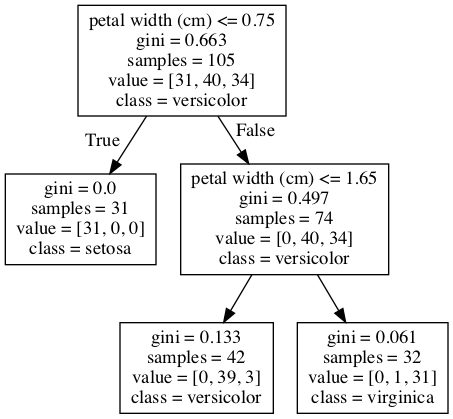

In [7]:
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_names)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  

# Show graph
Image(graph.create_png())

## Understanding the decision path of each sample

First let's retrieve the decision path of each sample. The `decision_path` method allows us to retrieve the node indicator functions. A non zero element of indicator matrix at the position `(i, j)` indicates that the sample `i` goes through the node `j`.

In [8]:
node_indicator = clf.decision_path(X_train)
msg = f"""
The decision path for sample X_train[0] - {X_train[0]} - was found in node 0, node 2 and node 3 - \
{node_indicator.toarray()[0]}.

The decision path for X_train[0] ends at node 3 because its petal width (cm) was less than or equal to 1.65.

This particular sample was classified into the {class_names[y_train[0]]} species of iris flowers.
"""
print(msg)


The decision path for sample X_train[0] - [6.1 2.8 4.7 1.2] - was found in node 0, node 2 and node 3 - [1 0 1 1 0].

The decision path for X_train[0] ends at node 3 because its petal width (cm) was less than or equal to 1.65.

This particular sample was classified into the versicolor species of iris flowers.



Similarly, we can also have the leaves ids reached by each sample.

In [9]:
leave_id = clf.apply(X_train)
leave_id[:3]

array([3, 1, 3])

Now, it's possible to get the tests that were used to predict a sample or a group of samples. First, let's make it for the sample.

In [10]:
sample_id = 2
X_train[sample_id]

array([5.1, 2.5, 3. , 1.1])

In [11]:
node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                    node_indicator.indptr[sample_id + 1]]

print(f"Rules used to predict sample {sample_id}:\n")
for node_id in node_index:
    if leave_id[sample_id] == node_id:
        continue

    if (X_test[sample_id, feature[node_id]] <= threshold[node_id]):
        threshold_sign = "<="
    else:
        threshold_sign = ">"

    print("decision id node {}: (X_test[{}, {}] (= {}) {} {})".format(
        node_id,
        sample_id,
        feature[node_id],
        X_test[sample_id, feature[node_id]],
        threshold_sign,
        threshold[node_id]
    ))

Rules used to predict sample 2:

decision id node 0: (X_test[2, 3] (= 2.1) > 0.75)
decision id node 2: (X_test[2, 3] (= 2.1) > 1.65)


In [12]:
# If the attributes get a little unwieldly, take a look at this help file
import sklearn.tree
help(sklearn.tree._tree.Tree)

Help on class Tree in module sklearn.tree._tree:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The maximal depth of the tree.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leaves,

In [13]:
# For a group of samples, we have the following common node.
sample_ids = list(range(3))
common_nodes = (node_indicator.toarray()[sample_ids].sum(axis=0) ==
                len(sample_ids))

common_node_id = np.arange(n_nodes)[common_nodes]

print(f"The following samples {sample_ids} share the node {common_node_id} in the tree")
print(f"{100 * len(common_node_id) / n_nodes}% of all samples exist in node {common_node_id}.")

The following samples [0, 1, 2] share the node [0] in the tree
20.0% of all samples exist in node [0].


## Understanding Gini Impurity

> [Gini Impurity](https://victorzhou.com/blog/gini-impurity/) is the probability of incorrectly classifying a randomly chosen element in the dataset if it were randomly labeled according to the class distribution in the dataset. It’s calculated as:

$$G = \sum_{i=1}^C p(i) * (1 - p(i))$$

where $C$ is the number of classes and $p(i)$ is the probability of randomly picking an element of class $i$.

Perfectly classified, Gini Impurity would be zero. This leads us to want splits where the Gini Impurity score is low.

> When training a decision tree, the best split is chosen by maximizing the Gini Gain, which is calculated by subtracting the weighted impurities of the branches from the original impurity.


To calculate the Gini Impurity fo each node, we'll need to know the following:

* which records in our sample - `X_train` - are in that particular node;
* the labels for those records in our sample in that node; and
* the proportion of each type of label divided by the total number of records in our sample in that node.

In [14]:
def calculate_gini_impurity(node):
    """Calculates the gini impurity of a given node"""
    index = []
    for ind, val in enumerate(node_indicator.toarray()[0:, node]):
        if val > 0:
            index.append(ind)
        else:
            pass
    labels = [y_train[i] for i in index]
    
    labels_n = []
    
    for class_ in clf.classes_:
        class_ = set([class_])
        labels_n.append(len([label for label in labels if label in class_]))
        
    labels_prop = np.array(labels_n) / len(index)
    return (labels_prop * (1 - labels_prop)).sum().round(3)

In [15]:
gini_impurity = []
for node in range(clf.tree_.node_count):
    gini_impurity.append(calculate_gini_impurity(node))
gini_impurity

[0.663, 0.0, 0.497, 0.133, 0.061]

For comparison, let's pull out the Gini Impurity scores found in our tree and ensure that our results are the same.

In [16]:
print(list(clf.tree_.impurity.round(3)))
gini_impurity == list(clf.tree_.impurity.round(3))

[0.663, 0.0, 0.497, 0.133, 0.061]


True

## Summary

Thank you for reading! Decision Tree Classifier class contain many attributes that help us understand the contents of how are data is being split to best categorize the labels. In this case, we used the `iris` data set to help us realize that the `petal width (cm)` feature was the most important feature in determining which observations belonged to a particular species (i.e. setosa, versicolor, and virginica).

### References

* https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

* https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

* https://scikit-learn.org/stable/tutorial/basic/tutorial.html

* https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html#sphx-glr-auto-examples-tree-plot-unveil-tree-structure-py

* https://victorzhou.com/blog/gini-impurity/

* https://chrisalbon.com/machine_learning/trees_and_forests/visualize_a_decision_tree/

* https://www.smartdraw.com/decision-tree/

* https://people.csail.mit.edu/dsontag/courses/ml16/slides/lecture11.pdf

* https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/tree/_tree.pyx

* https://jakevdp.github.io/PythonDataScienceHandbook/05.08-random-forests.html

* https://www.pinterest.com/pin/864057878480432148/

* http://suruchifialoke.com/2016-10-13-machine-learning-tutorial-iris-classification/